# Solar energy - Analysis of each cluster 
## with a country representative of each cluster

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "../../../datasets/_classified/kaggle/"

In [3]:
df_solar_co = pd.read_csv(path + "solar_generation_by_country.csv")
df_solar_co.head(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


cluster nb : 0 CY IE NO SE
    
cluster nb : 1 AT CH CZ HR HU IT SI SK

cluster nb : 2 BE DE DK FR LU NL UK
    
cluster nb : 3 EE FI LT LV PL
    
cluster nb : 4 BG EL RO
    
cluster nb : 5 ES PT

In [4]:
df_solar_co = df_solar_co[['NO', 'AT', 'FR', 'FI', 'RO', 'ES']]
df_solar_co.tail(2)

,NO,AT,FR,FI,RO,ES
262966,0.0,0.0,0.0,0.0,0.0,0.0
262967,0.0,0.0,0.0,0.0,0.0,0.0


Dealing with timestamps

In [5]:
def add_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=df_solar_co.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['hour'] = _df['time'].dt.hour
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.week
    return _df

In [6]:
df_solar_co = add_time(df_solar_co)
df_solar_co.tail(2)

,NO,AT,FR,FI,RO,ES,time,hour,month,week
262966,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,12,53
262967,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:00:00,23,12,53


# Analysis

### If we consider all values even during nights

In [7]:
def plot_hourly(df, title):
    plt.figure(figsize=(14, 9))
    for c in df.columns:
        if c != 'hour':
            sns.lineplot(x="hour", y=c, data=df, label=c)
            #plt.legend(c)
    plt.title(title)
    plt.show()

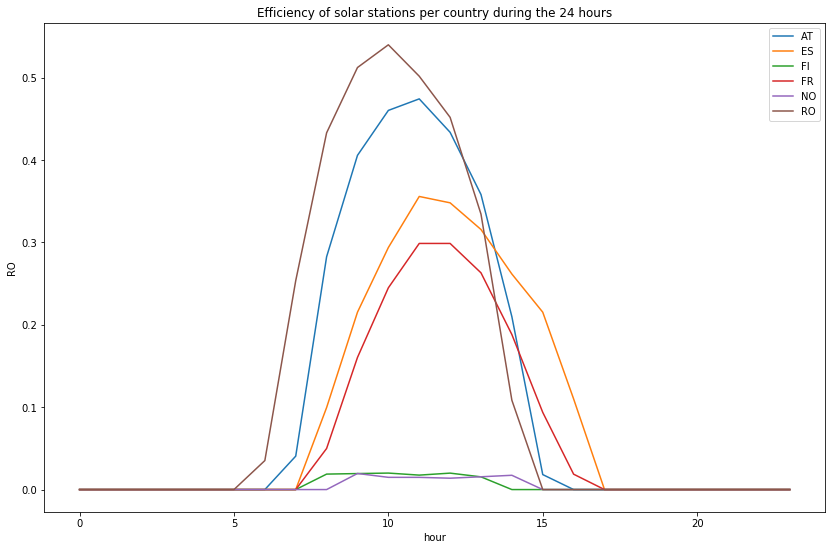

In [8]:

plot_hourly(df_solar_co[df_solar_co.columns.difference(['time', 'month', 'week'])][-24:], "Efficiency of solar stations per country during the 24 hours")

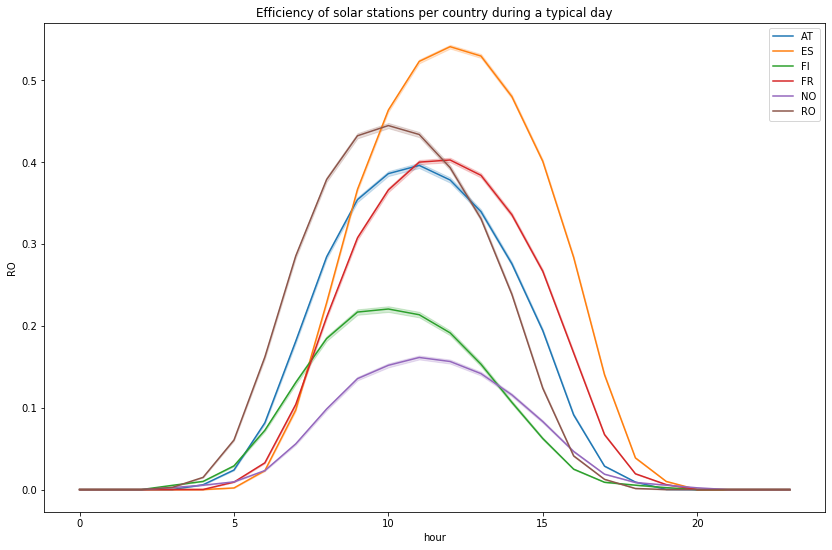

In [9]:
plot_hourly(df_solar_co[df_solar_co.columns.difference(['time', 'month', 'week'])], "Efficiency of solar stations per country during a typical day")

Distribution of the station's efficiency for non null values (ie during the day)

Text(0.5, 1.0, "Distribution of the station's efficiency for non null values (ie during the day)")

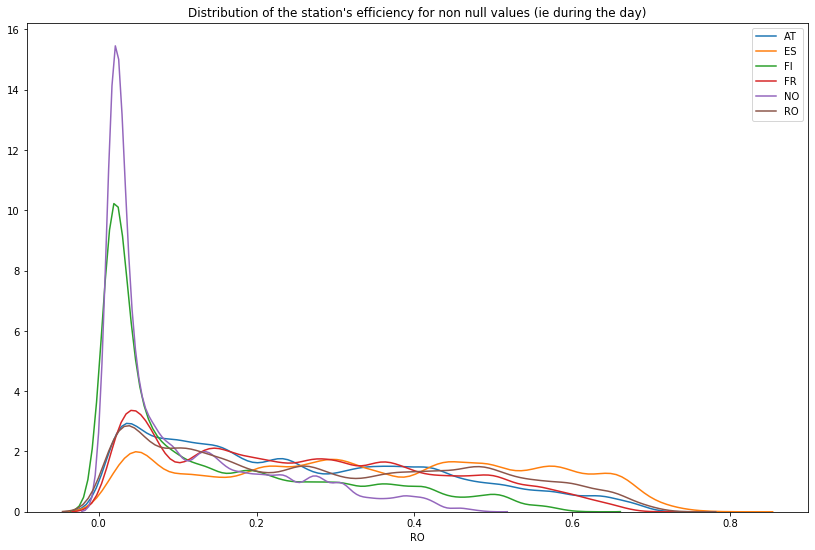

In [10]:
temp_df = df_solar_co[df_solar_co.columns.difference(['time', 'hour', 'month', 'week'])]
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency for non null values (ie during the day)")

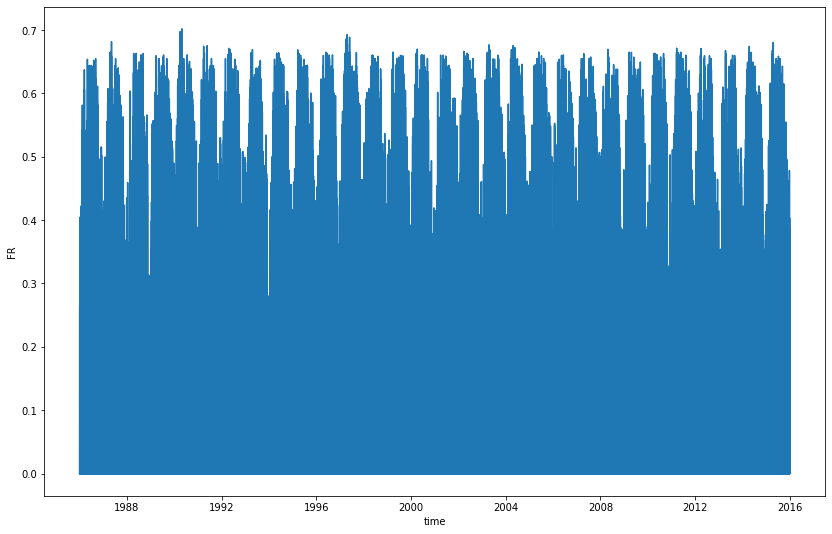

In [11]:
plt.figure(figsize=(14, 9))
sns.lineplot(x = df_solar_co.time, y = df_solar_co['FR'])

Text(0.5, 1.0, 'Efficiency across the months per country')

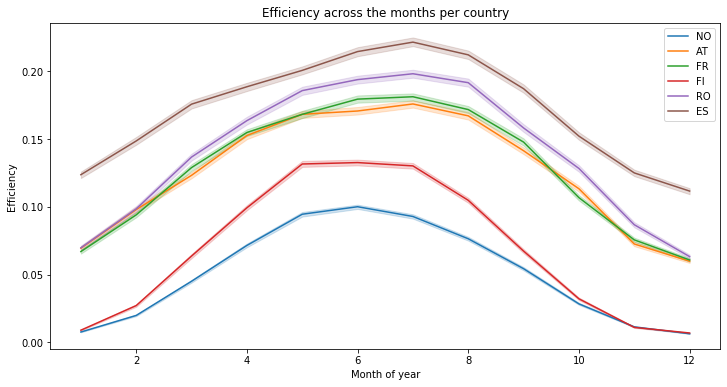

In [12]:
countries = ['NO', 'AT', 'FR', 'FI', 'RO', 'ES']

plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_solar_co[[c, 'month']]
    sns.lineplot(x=temp_df["month"], y=temp_df[c], label=c)
plt.xlabel("Month of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the months per country")

Text(0.5, 1.0, 'Efficiency across the weeks per country')

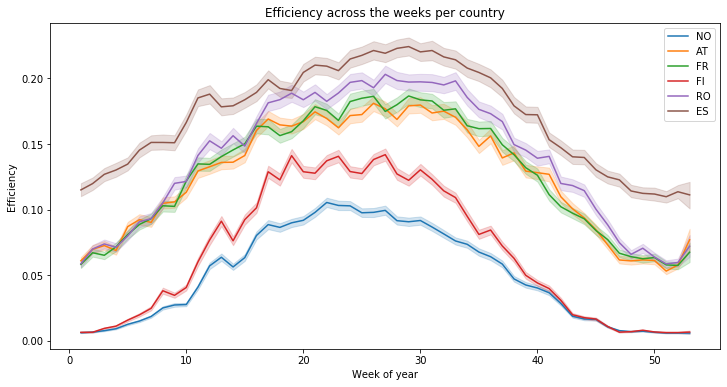

In [13]:
plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_solar_co[[c, 'week']]
    sns.lineplot(x=temp_df["week"], y=temp_df[c], label=c)
plt.xlabel("Week of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the weeks per country")

In [14]:
temp_df = df_solar_co.copy()
temp_df['year'] = temp_df['time'].dt.year
temp_df.head()

,NO,AT,FR,FI,RO,ES,time,hour,month,week,year
0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,0,1,1,1986
1,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1,1,1,1986
2,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 02:00:00,2,1,1,1986
3,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 03:00:00,3,1,1,1986
4,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 04:00:00,4,1,1,1986


Text(0.5, 1.0, 'Efficiency across the years per country')

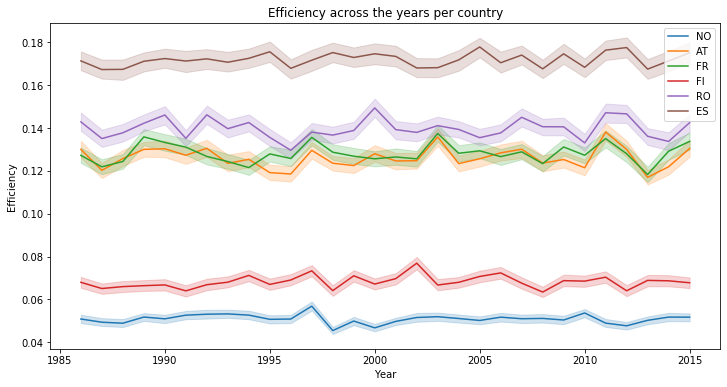

In [15]:
plt.figure(figsize=(12, 6))
for c in countries:
    temp_df_ = temp_df[[c, 'year']]
    sns.lineplot(x=temp_df_["year"], y=temp_df_[c], label=c)
plt.xlabel("Year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the years per country")

### If we consider ONLY values between 5 AM & 10 PM

In [16]:
temp_df = df_solar_co[(5 < df_solar_co.hour) & (df_solar_co.hour < 22)]
temp_df = temp_df.drop(columns=['time', 'hour', 'month', 'week'])
temp_df.describe()

,NO,AT,FR,FI,RO,ES
count,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000
mean,0.075220,0.187375,0.191680,0.099533,0.204717,0.257699
std,0.103796,0.191641,0.187002,0.142873,0.211509,0.228028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.025330,0.131469,0.147011,0.020212,0.133705,0.233841
75%,0.111076,0.335664,0.339958,0.157080,0.386842,0.458925
max,0.487921,0.715303,0.701985,0.615942,0.722990,0.793842


In [17]:
def plot_by_country(_df, title, nb_col):
    _df = _df.describe().iloc[nb_col, :]
    plt.figure(figsize=(14, 6))
    sns.barplot(x=_df.index, y=_df.values)
    plt.title(title)

#plot_by_country("Mean efficiency by country", 1)

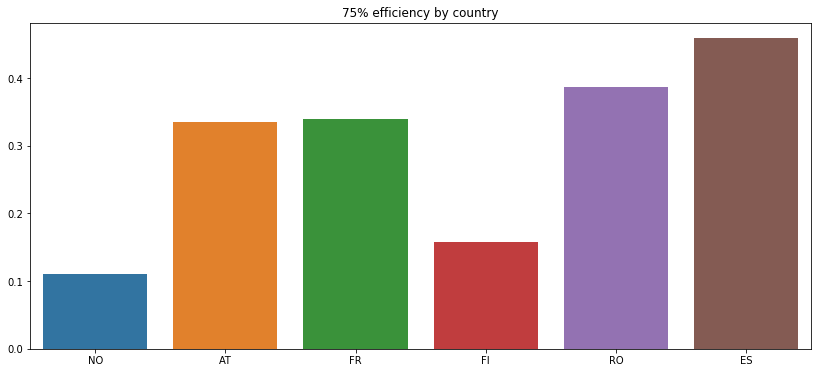

In [18]:
plot_by_country(temp_df, "75% efficiency by country", 6)

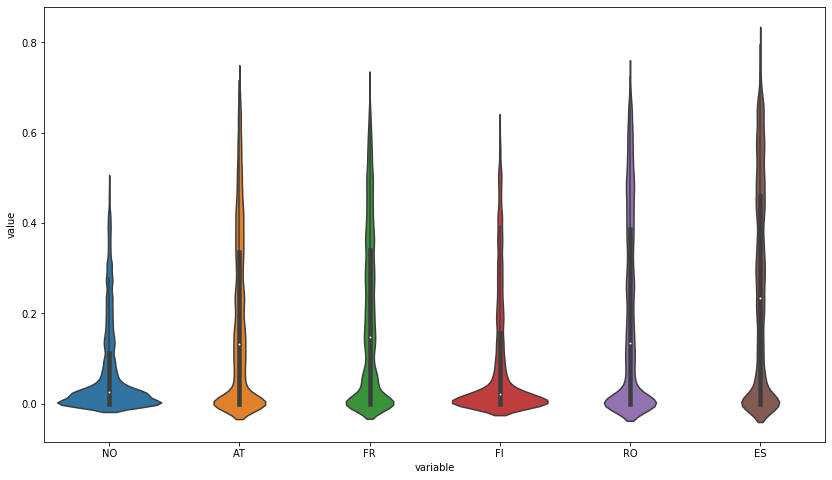

In [19]:
# credits : https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
# This works because pd.melt converts a wide-form dataframe
plt.figure(figsize=(14, 8))
sns.violinplot(x="variable", y="value", data=pd.melt(temp_df))

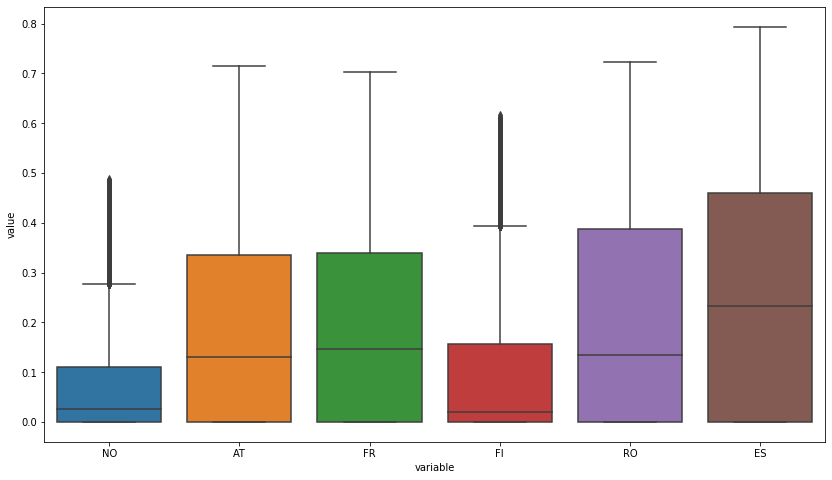

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(temp_df))

Text(0.5, 1.0, "Distribution of the station's efficiency")

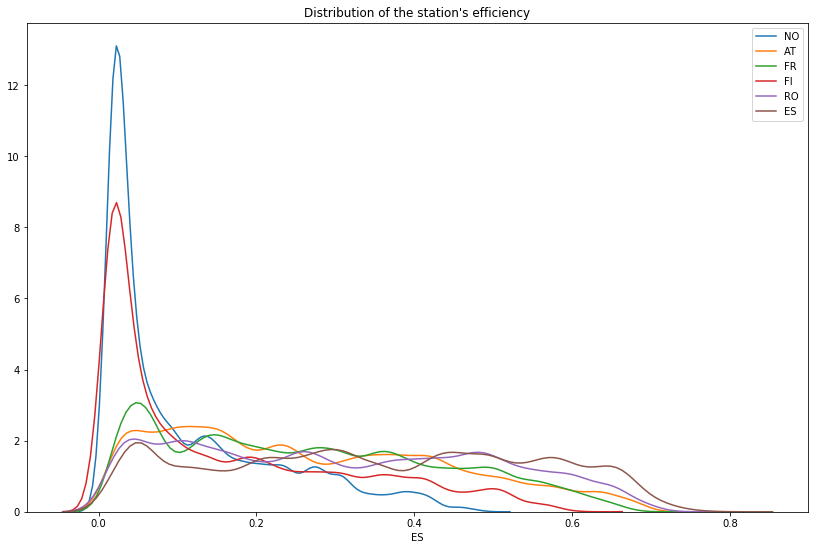

In [21]:
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency")

## Correlations

In [22]:
def plot_corr(df_):
    corr = df_.corr()
    corr

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(14, 12))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, center=0, square=True, cmap='Spectral', linewidths=.5, cbar_kws={"shrink": .5}) #annot=True

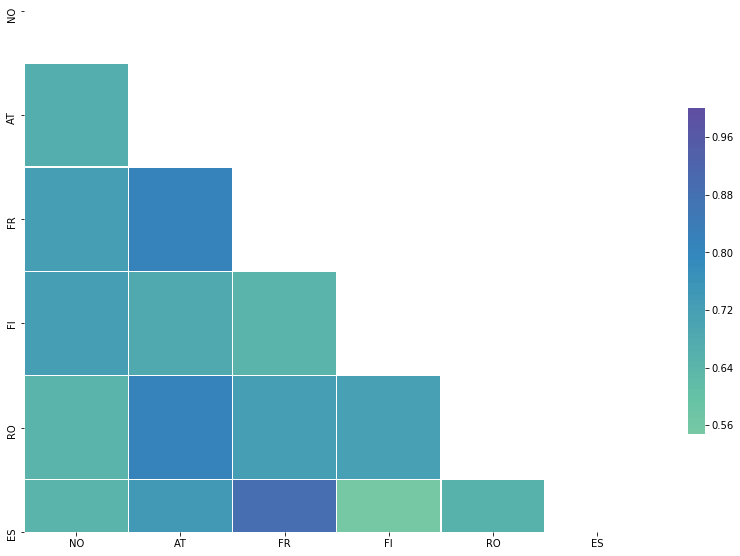

In [23]:
plot_corr(temp_df)

In [24]:
temp_df.corr()

,NO,AT,FR,FI,RO,ES
NO,1.000000,0.668562,0.724858,0.723009,0.648708,0.641740
AT,0.668562,1.000000,0.818610,0.684129,0.819165,0.741216
FR,0.724858,0.818610,1.000000,0.646947,0.718909,0.888815
FI,0.723009,0.684129,0.646947,1.000000,0.718531,0.547065
RO,0.648708,0.819165,0.718909,0.718531,1.000000,0.653520
ES,0.641740,0.741216,0.888815,0.547065,0.653520,1.000000


## Heatmap month vs hours 

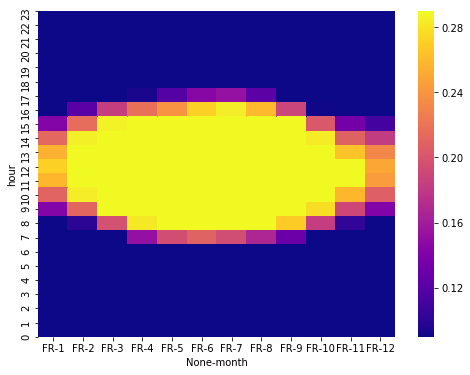

In [25]:
# credits S Godinho @ https://www.kaggle.com/sgodinho/wind-energy-potential-prediction

df_solar_co['year'] = df_solar_co['time'].dt.year
plt.figure(figsize=(8, 6))
temp_df = df_solar_co[['FR', 'month', 'hour']]
temp_df = temp_df.groupby(['hour', 'month']).mean()
temp_df = temp_df.unstack('month').sort_index(ascending=False)
sns.heatmap(temp_df, vmin = 0.09, vmax = 0.29, cmap = 'plasma')